<a href="https://colab.research.google.com/github/NCAR/lrose-solo-python/blob/main/Copy_of_TestSolo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Setup Workspace

Install Miniconda, create environment, install pyArt and relevant dependencies

In [ ]:
print('\x1b[32mInstalling Miniconda...\x1b[0m')
! wget https://repo.anaconda.com/miniconda/Miniconda3-py37_4.8.2-Linux-x86_64.sh
! chmod +x Miniconda3-py37_4.8.2-Linux-x86_64.sh
! bash ./Miniconda3-py37_4.8.2-Linux-x86_64.sh -b -f -p /usr/local
import sys
sys.path.append('/usr/local/lib/python3.7/site-packages/')

print('\x1b[32mUpdating Conda...\x1b[0m')
! conda update -y -n base -c defaults conda
print('\x1b[32mCreating environment...\x1b[0m')
! conda create -y -n pyart_env -c conda-forge python=3.8 arm_pyart
print('\x1b[32mInstalling Cartopy...\x1b[0m')
! conda install -y -c conda-forge cartopy
print('\x1b[32mInstalling PyArt...\x1b[0m')
! conda install -y -c conda-forge arm_pyart
print('\x1b[32mInstalling Pip...\x1b[0m')
! conda install pip -y
import google.colab
google.colab.output.clear()
print('\x1b[32mSuccessfully installed libraries!\x1b[0m')


Import the libraries installed above

In [ ]:
import netCDF4
import pyart
import numpy as np
import cartopy.crs as ccrs
import matplotlib.pyplot as plt
from copy import deepcopy

Install and import the PySolo package

In [ ]:
! pip uninstall -y pysolo-wip
! pip install -i https://test.pypi.org/simple/ pysolo-wip==0.0.230
import pysolo_package as solo

Found existing installation: pysolo-wip 0.0.230
Uninstalling pysolo-wip-0.0.230:
  Successfully uninstalled pysolo-wip-0.0.230
Looking in indexes: https://test.pypi.org/simple/
     |████████████████████████████████| 65 kB 1.7 MB/s 


# Testing despeckle with sample data

In [ ]:
# sample data 1 (only required parameters)
# the sample above used all possible parameters, however, only 3 of those paramters
# are required, the rest are optional and will be given default values if not
# specified

# lets run despeckle again, with the same data as before, but this time, relying on
# the optional parameters to simplify the call.

# input_data is alwasy required
input_data = [-3,-3, -3, 5, 5, 5, -3, 5, 5, -3]

# bad is always required
bad = -3

# a_speckle is always required
a_speckle = 3

# input_mask is an optional parameter, if not specified, then it will automatically
# generate the input_mask for you, based on the good/bad values of input_data

# dgi_clip_gate is an optional parameter, if not specified, it will simply be set
# to the length of input_data

# boundary_mask is an optional parameter, if not specified, it will be set to all
# true, so despeckle is ran on all data.

# this is the expected return from the function (no change)
expected_data = [-3, -3, -3, -3, -3, -3, -3, -3, -3, -3]

# run despeckle
output = solo.despeckle(input_data, bad, a_speckle)
assert output.data == expected_data, output.data
print("Correct")

Correct


In [ ]:
ray_data = [
    [12.48, 23.88, 20.15, 16.07, 17.53, 10.60, 18.55, 18.96, 19.36, 22.45],
    [12.48, 23.89, 20.21, 13.96, 2.57, 6.72, 19.02, 19.74, 19.83, 22.59],
    [12.43, 24.01, 20.18, 12.16, 17.55, 10.74, 18.41, 19.03, 19.05, 22.39],
    [12.42, 24.09, 13.07, 11.42, 17.46, 6.61, 19.05, 19.95, 19.46, 22.57],
    [12.49, 24.07, 11.35, -32768.00, 17.34, -32768.00, 17.87, -32768.00, 8.98, 22.04],
    [12.57, -32768.00, 19.53, -32768.00, 16.91, 7.49, -32768.00, 19.11, 12.85, 22.89]
]

ray_mask = [
    [False, False, False, False, False, False, False, False, False, False],
    [False, False, False, False, False, False, False, False, False, False],
    [False, False, False, False, False, False, False, False, False, False],
    [False, False, False, False, False, False, False, False, False, False],
    [False, False, False, True, False, True, False, True, False, False],
    [False, True, False, True, False, False, True, False, False, False]            
]

bad = -32768.00

ma = np.ma.masked_array(data = ray_data, mask = ray_mask, fill_value = bad)

a_speckle = 3
output_mask = solo.despeckle_masked(ma, a_speckle)
print(output_mask.all)


In [ ]:
# sample data 2
# new data
# use dgi_clip_gate as the only optional parameter
input_data = [-3, -3, 5, -3]
bad = -3
a_speckle = 1
dgi_clip_gate = 2

expected_data = [-3, -3, 5, -3]

# run despeckle
output = solo.despeckle(input_data, bad, a_speckle, dgi_clip_gate = dgi_clip_gate)
assert output.data == expected_data
print("Correct (no change)")

Correct (no change)


In [ ]:
# sample data 3
# use dgi_clip_gate as the only optional parameter
input_data = [-3, -3, 5, -3]
bad = -3
a_speckle = 1
dgi_clip_gate = 3

expected_data = [-3, -3, 5, -3]

# run despeckle
output = solo.despeckle(input_data, bad, a_speckle, dgi_clip_gate = dgi_clip_gate)
assert output.data == expected_data
print("Correct (no change)")

Correct (no change)


In [ ]:
# sample data 4
# use only required parameters
input_data = [3, -3, 5, 5, 5, -3 ,6]
bad = -3
a_speckle = 3

expected_data = [-3,-3,-3,-3,-3,-3, -3]

# run despeckle
output = solo.despeckle(input_data, bad, a_speckle)
assert output.data == expected_data
print("Correct")

Correct


In [ ]:
# sample data 5
# use dgi_clip_gate as the only optional parameter
input_data = [3, -3, -3, 5, 5, 5, -3, 5, 5, -3]
bad = -3
a_speckle = 3
dgi_clip_gate = 8

expected_data = [-3, -3, -3, -3, -3, -3, -3, 5, 5, -3]

# run despeckle
output = solo.despeckle(input_data, bad, a_speckle, dgi_clip_gate = dgi_clip_gate)
assert output.data == expected_data
print("Correct")

Correct


In [ ]:
# sample data 6
# use dgi_clip_gate and boundary_mask as the optional parameters
input_data = [3, -3, -3, 5, 5, 5, -3, 5, 5, -3]
bad = -3
a_speckle = 3
dgi_clip_gate = 8
boundary_mask = [True, True, False, False, False, False, False, False, False, False]

expected_data = [-3, -3, -3, 5, 5, 5, -3, 5, 5, -3]

# run despeckle
output = solo.despeckle(input_data, bad, a_speckle, boundary_mask = boundary_mask)
assert output.data == expected_data
print("Correct")

Correct


In [ ]:
# sample data 7
# use dgi_clip_gate and boundary_mask as the optional parameters
input_data = [3,-3, -3, 5, 5, 5, -3, 5, 5, -3]
bad = -3
a_speckle = 3
dgi_clip_gate = 8
boundary_mask = [True, True, True, True, False, False, False, False, False, False]

expected_data = [-3, -3, -3, 5, 5, 5, -3, 5, 5, -3]

# run despeckle
output = solo.despeckle(input_data, bad, a_speckle, dgi_clip_gate = dgi_clip_gate, boundary_mask = boundary_mask)
assert output.data == expected_data
print("Correct")

Correct


In [ ]:
# sample data 8
# use dgi_clip_gate and boundary_mask as the optional parameters
input_data = [-3.0, -3.0, -3.0, 5.0, 5.0, 5.0, -3.0, 5.0, 5.0, -3.0]
bad = -3.0
a_speckle = 3
dgi_clip_gate = 10
boundary_mask = [False, False, False, False, False, False, True, True, True, True]

expected_data = [-3.0, -3.0, -3.0, 5.0, 5.0, 5.0, -3.0, -3.0, -3.0, -3]

# run despeckle
output = solo.despeckle(input_data, bad, a_speckle, dgi_clip_gate = dgi_clip_gate, boundary_mask = boundary_mask)
assert output.data == expected_data
print("Correct")

Correct


In [ ]:
# sample data 9
# use dgi_clip_gate and boundary_mask as the optional parameters
input_data = [-3, -3, -3, 5, 5, 5, -3, 5, 5, -3]
bad = -3
a_speckle = 3
dgi_clip_gate = 10
boundary_mask = [False, False, True, True, True, True, True, True, False, False]

expected_data = [-3, -3, -3,-3,-3,-3, -3, 5, 5, -3]

# run despeckle
output = solo.despeckle(input_data, bad, a_speckle, dgi_clip_gate = dgi_clip_gate, boundary_mask = boundary_mask)
assert output.data == expected_data
print("Correct")

Correct


In [ ]:
# sample data 10
# use dgi_clip_gate as the only optional parameter
input_data = [5, -3, -3, -3, 5, 5, -3]
bad = -3
a_speckle = 3
dgi_clip_gate = 5

expected_data = [-3, -3, -3, -3, 5, 5, -3]

# run despeckle
output = solo.despeckle(input_data, bad, a_speckle, dgi_clip_gate = dgi_clip_gate)
assert output.data == expected_data
print("Correct")

Correct


In [ ]:
# sample data 11
# use dgi_clip_gate and boundary_mask as the optional parameters
input_data = [-3,  5,  5, -3, -3, 5, 5]
bad = -3
a_speckle = 3
dgi_clip_gate = 5
boundary_mask = [False, False, True, True, True, True, False]

expected_data = [-3, 5, 5, -3, -3, 5, 5]

# run despeckle
output = solo.despeckle(input_data, bad, a_speckle, dgi_clip_gate = dgi_clip_gate, boundary_mask = boundary_mask)
assert output.data == expected_data
print("Correct")

Correct


In [ ]:
# sample data 8.2 testing with slight error in float value for bad data
input_data = [-3.0, -3.0, -3.0, 5.0, 5.0, 5.0, -3.0, 5.0, 5.0, -3.0]
bad = -3.000002
a_speckle = 3
dgi_clip_gate = 10
boundary_mask = [False, False, False, False, False, False, True, True, True, True]

expected_data = [-3.0, -3.0, -3.0, 5.0, 5.0, 5.0, -3.0, -3.0, -3.0, -3]

# run despeckle
output = solo.despeckle(input_data, bad, a_speckle, dgi_clip_gate, boundary_mask)
assert output.data != expected_data
print("Correct")

Correct


# Extract real data from NetCDF file

Load data file from Cloud and save to object

In [ ]:
! wget -O radar_data.nc https://www.dropbox.com/s/lltr0hyt3excg2g/radar_data.nc?dl=0

--2021-07-09 19:27:05--  https://www.dropbox.com/s/lltr0hyt3excg2g/radar_data.nc?dl=0
Resolving www.dropbox.com (www.dropbox.com)... 162.125.5.18, 2620:100:601d:18::a27d:512
Connecting to www.dropbox.com (www.dropbox.com)|162.125.5.18|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: /s/raw/lltr0hyt3excg2g/radar_data.nc [following]
--2021-07-09 19:27:05--  https://www.dropbox.com/s/raw/lltr0hyt3excg2g/radar_data.nc
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://uc39280d7e49e1da9a471cfb2e5f.dl.dropboxusercontent.com/cd/0/inline/BR835dFxXpwlEzh1NsveX71XXmost12Xilq9F3QZLExZJH3tDpl_P8Qe0XK0ddkyTy0AWEPQQBO8U0vlDG1xrVpNH498AWo87BghuUiVhpXTGpp0V8Z0HBcCa9M4M-nALQOCQGtNWEiFc8Q34_OYT_6u/file# [following]
--2021-07-09 19:27:06--  https://uc39280d7e49e1da9a471cfb2e5f.dl.dropboxusercontent.com/cd/0/inline/BR835dFxXpwlEzh1NsveX71XXmost12Xilq9F3QZLExZJH3tDpl_P8Qe0XK0ddkyTy0AWEPQQBO8U0vlDG

Read NetCDF file, save result to Radar object

In [ ]:
# Read the NetCDF data.
radar = pyart.io.read("/content/radar_data.nc")

Retrieve all fields from Data

In [ ]:
print(list(radar.fields.keys()))

['DBZ_TOT', 'DBZ', 'VEL', 'WIDTH', 'SQI', 'VG', 'VR', 'SW', 'NCP', 'ZZ', 'VV', 'V1', 'DBZTEST', 'VGTEST', 'Z1', 'ZC', 'VC']


Extract the rays from 'ZZ' and 'VV' fields. This returns the missing value and a list of lists of data and corresponding masks

In [ ]:
print("[ZZ]".center(40, '='))
missing_ZZ = radar.fields['ZZ']['data'].fill_value
rays_data_ZZ = radar.fields['ZZ']['data'].tolist(missing_ZZ)
print("[ZZ] Missing Value: %d" % missing_ZZ)
print("[ZZ] Number of Rays: %d" % len(rays_data_ZZ))
print("[ZZ] Number of Gates per Ray: %d\n" % len(rays_data_ZZ[0]))

print("[VV]".center(40, '='))
missing_VV = radar.fields['VV']['data'].fill_value
rays_data_VV = radar.fields['VV']['data'].tolist(missing_VV)
print("[VV] Missing Value: %d" % missing_VV)
print("[VV] Number of Rays: %d" % len(rays_data_VV))
print("[VV] Number of Gates per Ray: %d\n" % len(rays_data_VV[0]))

rays_mask_ZZ = radar.fields['ZZ']['data'].mask.tolist()

==================[ZZ]==================
[ZZ] Missing Value: -32768
[ZZ] Number of Rays: 360
[ZZ] Number of Gates per Ray: 627

==================[VV]==================
[VV] Missing Value: -32768
[VV] Number of Rays: 360
[VV] Number of Gates per Ray: 627



# Testing despeckle with real data

Do a despeckle on ZZ field

Method:

1.   pass in the masked array and a_speckle values as parameter to `despseckle_masked`
2.   function returns resultant masked array

In [ ]:
#@title Despeckle Parameters

a_speckle = 2 #@param {type: "slider", min: 1, max: 16}

despeckled_mask = solo.despeckle_masked(radar.fields['ZZ']['data'], a_speckle)

Create a new field (inheriting properties of ZZ) using the newly obtained despeckled masked array

In [ ]:
radar.add_field_like('ZZ', 'ZZ_despeckled', despeckled_mask, replace_existing=True)

assert ('ZZ_despeckled' in radar.fields)

Plot for ZZ, original vs despeckled

/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:748: UserWarning: Warning: 'partition' will ignore the 'mask' of the MaskedArray.
  a.partition(kth, axis=axis, kind=kind, order=order)
/usr/local/lib/python3.7/site-packages/pyart/graph/radardisplay.py:104: UserWarning: RadarDisplay does not correct for moving platforms
  warnings.warn('RadarDisplay does not correct for moving platforms')


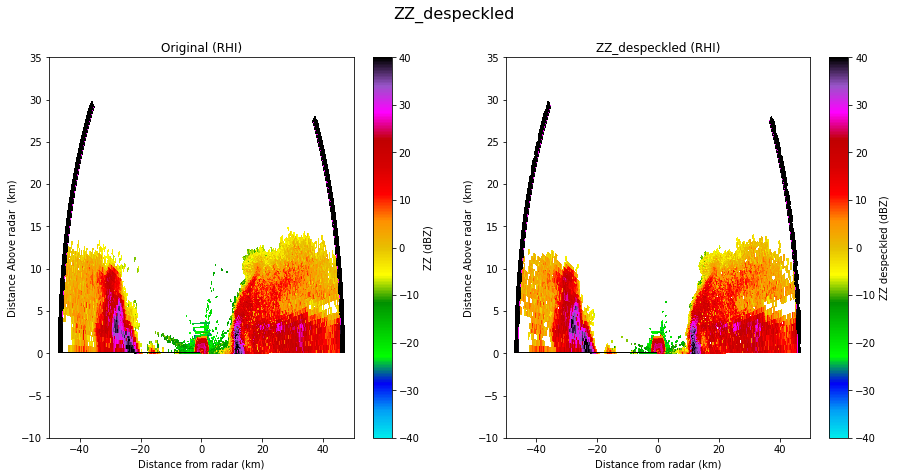

In [ ]:
display = pyart.graph.RadarMapDisplay(radar)

fig, ax = plt.subplots(ncols=2, figsize=(15,7))
display.plot(field='ZZ', vmin=-40, vmax=40, title="Original (RHI)", cmap='pyart_NWSRef', ax=ax[0])
display.set_limits((-50, 50), (-10, 35), ax=ax[0])
display.plot(field="ZZ_despeckled", vmin=-40, vmax=40, title="ZZ_despeckled" + " (RHI)", cmap='pyart_NWSRef', ax=ax[1])
display.set_limits((-50, 50), (-10, 35), ax=ax[1])
plt.suptitle("ZZ_despeckled", fontsize=16)
plt.show()

# Testing ring zap with sample data

In [ ]:
from_km = 2
to_km = 9
input_data = [-3, 4, 6, -3, 8, -3, 10, 12, 14, -3, -3]
bad = -3
boundary_mask = [False, False, False, False, False, False, False, False, False, False, False]
expected_data = [-3, 4, 6, -3, 8, -3, 10, 12, 14, -3, -3]
output_data = solo.ring_zap(input_data, bad, from_km, to_km, boundary_mask = boundary_mask)
assert (output_data.data == expected_data)
print("Correct")

Correct


In [ ]:
from_km = 2
to_km = 9
input_data = [-3, 4, 6, -3, 8, -3, 10, 12, 14, -3, -3]
bad = -3
boundary_mask = [True, True, True, True, True, True, True, True, True, True, True]
expected_data = [-3, 4, -3, -3, -3, -3, -3, -3, -3, -3, -3]
output_data = solo.ring_zap(input_data, bad, from_km, to_km, boundary_mask = boundary_mask)
assert (output_data.data == expected_data)
print("Correct")

Correct


In [ ]:
from_km = 2
to_km = 9
input_data = [-3, 4, 6, -3, 8, -3, 10, 12, 14, -3, -3]
bad = -3
boundary_mask = [True, True, True, True, False, True, True, True, True, True, True]
expected_data = [-3, 4, -3, -3, 8, -3, -3, -3, -3, -3, -3]
output_data = solo.ring_zap(input_data, bad, from_km, to_km, boundary_mask = boundary_mask)
assert (output_data.data == expected_data)
print("Correct")

Correct


# Test Ring Zap with Real Data

Run ring zap on all rays

In [ ]:
#@title Despeckle Parameters
output_ZZ_data = []
output_ZZ_mask = []

from_km =  25 #@param {type: "number"}
to_km = 30 #@param {type: "number"}

kilometers_between_gates = radar.range['meters_between_gates'] / 1000
from_km_convert = int(from_km / kilometers_between_gates)
to_km_convert = int(to_km / kilometers_between_gates)

ring_zapped_mask = solo.ring_zap_masked(radar.fields['ZZ']['data'], from_km, to_km, kilometers_between_gates)


In [ ]:
radar.add_field_like('ZZ', 'ZZ_ring_zapped', ring_zapped_mask, replace_existing=True)

assert ('ZZ_ring_zapped' in radar.fields)

/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:748: UserWarning: Warning: 'partition' will ignore the 'mask' of the MaskedArray.
  a.partition(kth, axis=axis, kind=kind, order=order)
/usr/local/lib/python3.7/site-packages/pyart/graph/radardisplay.py:104: UserWarning: RadarDisplay does not correct for moving platforms
  warnings.warn('RadarDisplay does not correct for moving platforms')


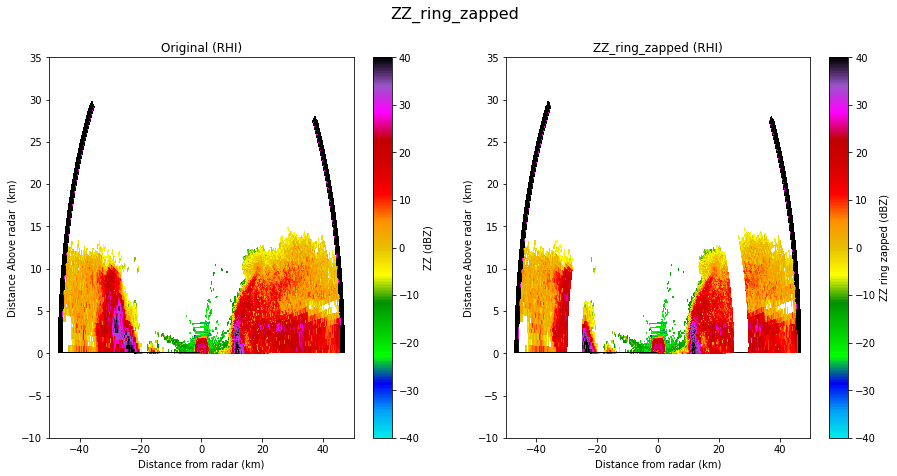

In [ ]:
display = pyart.graph.RadarMapDisplay(radar)

fig, ax = plt.subplots(ncols=2, figsize=(15,7))
display.plot(field='ZZ', vmin=-40, vmax=40, title="Original (RHI)", cmap='pyart_NWSRef', ax=ax[0])
display.set_limits((-50, 50), (-10, 35), ax=ax[0])
display.plot(field="ZZ_ring_zapped", vmin=-40, vmax=40, title="ZZ_ring_zapped" + " (RHI)", cmap='pyart_NWSRef', ax=ax[1])
display.set_limits((-50, 50), (-10, 35), ax=ax[1])
plt.suptitle("ZZ_ring_zapped", fontsize=16)
plt.show()

# Test threshold field with sample data

Threshold uses an enum "Where" with values ABOVE, BELOW, and BETWEEN. Reference it as "solo.Where.BELOW" or do "`from... import...`" to shorten to "Where.BELOW"

In [ ]:
from pysolo_package import Where

In [ ]:
input_data =    [-3,  4,  6, -3,  8,  -3, 10,  12, 14, -3, -3 ]
thr_data =      [-5, 30, 40, 60, -5,  70, -5, 110, -5, 10, 140]
expected_data = [-3,  4,  6, -3,  -3, -3, -3,  12, -3, -3, -3 ]

bad = -3
thr_bad = -5

boundary_mask = [True, True, True, True, True, True, True, True, True, True, True]


output_data = solo.threshold(input_data, thr_data, bad, Where.BELOW.value, 0.333, 0.000, thr_missing=thr_bad)
assert output_data.data == expected_data
print("Correct")

Correct


In [ ]:
input_data =    [-3,  4,  6, -3,  8,  -3, 10,  12, 14, -3, -3 ]
thr_data =      [-5, 30, 40, 60, -5,  70, -5, 110, -5, 10, 140]
expected_data = [-3,  4,  6, -3,  8,  -3, 10,  12, 14, -3, -3 ]

bad = -3
thr_bad = -5

boundary_mask = [False, False, False, False, False, False, False, False, False, False, False]

output_data = solo.threshold(input_data, thr_data, bad, Where.BELOW.value, 0.333, 0.000, thr_missing=thr_bad, boundary_mask=boundary_mask)
assert output_data.data == expected_data, output_data.data
print("Correct")

Correct


In [ ]:
input_data =    [-3,  4,  6, -3,  8,  -3, 10,  12, 14, -3, -3 ]
thr_data =      [-5, 30, 40, 60, -5,  70, -5, 110, -5, 10, 140]
expected_data = [-3, -3, -3, -3, -3, -3, -3, 12, -3, -3, -3]

bad = -3
thr_bad = -5

boundary_mask = [True, True, True, True, True, True, True, True, True, True, True]

output_data = solo.threshold(input_data, thr_data, bad, Where.BELOW.value, 50, 0.000, thr_missing=thr_bad)
assert output_data.data == expected_data
print("Correct")

Correct


# Testing threshold field with real data

In [ ]:
#@title Despeckle Parameters
output_ZZ_data = []
output_ZZ_mask = []

thr_1 =  -7 #@param {type: "number"}
thr_2 = -8 #@param {type: "number"}
total_changes = 0

threshold_mask_below = solo.threshold_masked(radar.fields['ZZ']['data'], radar.fields['VV']['data'], solo.Where.BELOW.value, thr_1, thr_2)
threshold_mask_above = solo.threshold_masked(radar.fields['ZZ']['data'], radar.fields['VV']['data'], solo.Where.ABOVE.value, thr_1, thr_2)


In [ ]:
radar.add_field_like('ZZ', 'ZZ_threshold_below', threshold_mask_below, replace_existing=True)
radar.add_field_like('ZZ', 'ZZ_threshold_above', threshold_mask_above, replace_existing=True)

/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:748: UserWarning: Warning: 'partition' will ignore the 'mask' of the MaskedArray.
  a.partition(kth, axis=axis, kind=kind, order=order)
/usr/local/lib/python3.7/site-packages/pyart/graph/radardisplay.py:104: UserWarning: RadarDisplay does not correct for moving platforms
  warnings.warn('RadarDisplay does not correct for moving platforms')


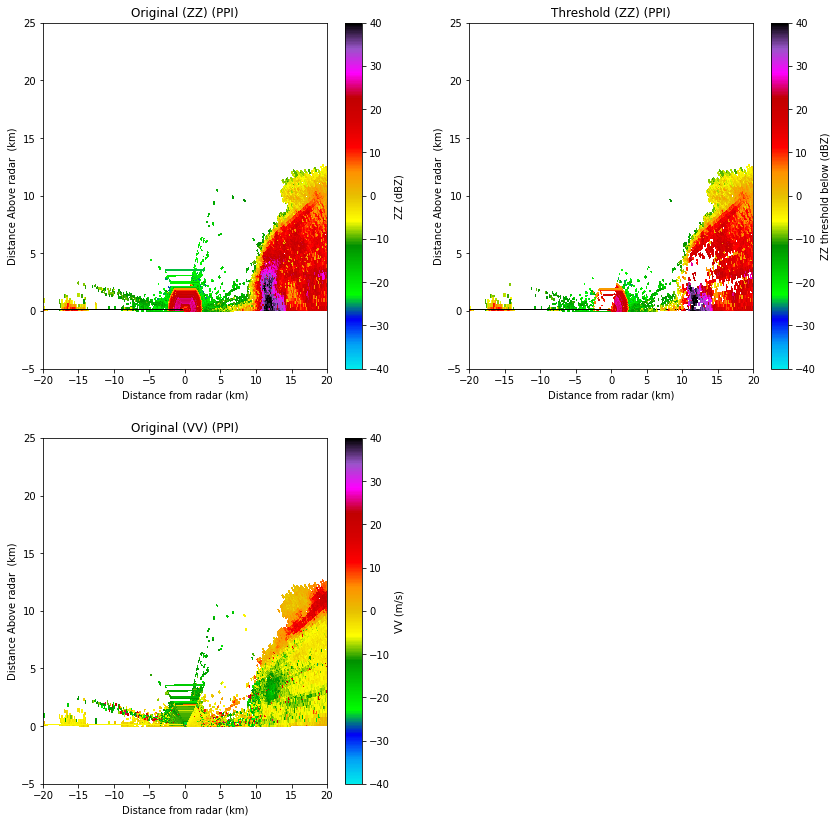

In [ ]:
display = pyart.graph.RadarMapDisplay(radar)

fig = plt.figure(figsize=(14, 14))

ax = fig.add_subplot(221)
display.plot(field='ZZ', vmin=-40, vmax=40, title="Original (ZZ) (PPI)", cmap='pyart_NWSRef')
display.set_limits((-20, 20), (-5, 25), ax=ax)

ax = fig.add_subplot(222)
display.plot(field='ZZ_threshold_below', vmin=-40, vmax=40, title="Threshold (ZZ) (PPI)", cmap='pyart_NWSRef')
display.set_limits((-20, 20), (-5, 25), ax=ax)

ax = fig.add_subplot(223)
display.plot(field='VV', vmin=-40, vmax=40, title="Original (VV) (PPI)", cmap='pyart_NWSRef')
display.set_limits((-20, 20), (-5, 25), ax=ax)

plt.show()

/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:748: UserWarning: Warning: 'partition' will ignore the 'mask' of the MaskedArray.
  a.partition(kth, axis=axis, kind=kind, order=order)
/usr/local/lib/python3.7/site-packages/pyart/graph/radardisplay.py:104: UserWarning: RadarDisplay does not correct for moving platforms
  warnings.warn('RadarDisplay does not correct for moving platforms')


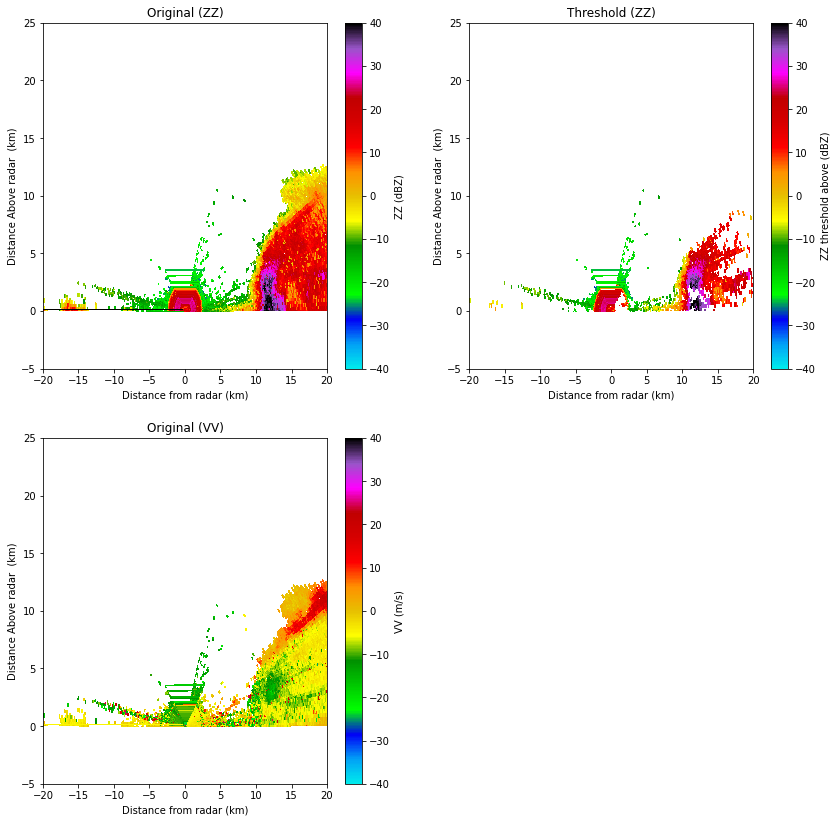

In [ ]:
display = pyart.graph.RadarMapDisplay(radar)

fig = plt.figure(figsize=(14, 14))

ax = fig.add_subplot(221)
display.plot(field='ZZ', vmin=-40, vmax=40, title="Original (ZZ)", cmap='pyart_NWSRef')
display.set_limits((-20, 20), (-5, 25), ax=ax)

ax = fig.add_subplot(222)
display.plot(field='ZZ_threshold_above', vmin=-40, vmax=40, title="Threshold (ZZ)", cmap='pyart_NWSRef')
display.set_limits((-20, 20), (-5, 25), ax=ax)

ax = fig.add_subplot(223)
display.plot(field='VV', vmin=-40, vmax=40, title="Original (VV)", cmap='pyart_NWSRef')
display.set_limits((-20, 20), (-5, 25), ax=ax)

plt.show()

# Test deglitch with sample data


In [ ]:
# test flag_glitches
input_data = [3, 4, 5, -6, -7, 4, 4, 5]
input_bad_flag = [False, False, False, False, True, True, True, True]
bad = -3
deglitch_threshold = 3
deglitch_radius = 1
deglitch_min_bins = 3
expected_bad_flag = [False, False, True, False, True, True, True, True]
output_bad_flag = solo.flag_glitches(input_data, bad, deglitch_threshold, deglitch_radius, deglitch_min_bins, input_bad_flag)
assert (output_bad_flag.mask == expected_bad_flag)
print("Correct")

Correct


# Test deglitch with real data

In [ ]:
#@title Flag Glitches Parameters
deglitch_threshold = 1 #@param {type: "number"}
deglitch_radius = 25 #@param {type: "number"}
deglitch_min_bins = 20 #@param {type: "number"}

flag_glitches_mask = solo.flag_glitches_masked(radar.fields['ZZ']['data'], deglitch_threshold, deglitch_radius, deglitch_min_bins)

In [ ]:
radar.add_field_like('ZZ', 'ZZ_flag_glitch', flag_glitches_mask, replace_existing=True)

assert ('ZZ_flag_glitch' in radar.fields)

/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:748: UserWarning: Warning: 'partition' will ignore the 'mask' of the MaskedArray.
  a.partition(kth, axis=axis, kind=kind, order=order)
/usr/local/lib/python3.7/site-packages/pyart/graph/radardisplay.py:104: UserWarning: RadarDisplay does not correct for moving platforms
  warnings.warn('RadarDisplay does not correct for moving platforms')


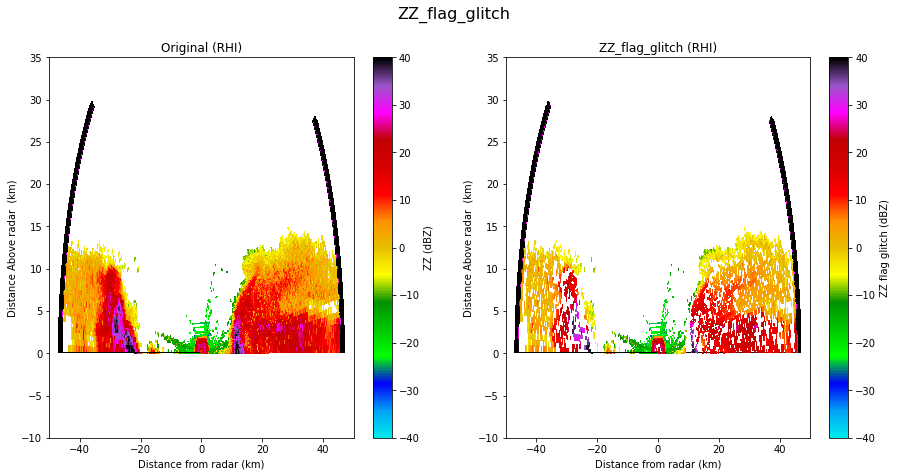

In [ ]:
display = pyart.graph.RadarMapDisplay(radar)

fig, ax = plt.subplots(ncols=2, figsize=(15,7))
display.plot(field='ZZ', vmin=-40, vmax=40, title="Original (RHI)", cmap='pyart_NWSRef', ax=ax[0])
display.set_limits((-50, 50), (-10, 35), ax=ax[0])
display.plot(field="ZZ_flag_glitch", vmin=-40, vmax=40, title="ZZ_flag_glitch" + " (RHI)", cmap='pyart_NWSRef', ax=ax[1])
display.set_limits((-50, 50), (-10, 35), ax=ax[1])
plt.suptitle("ZZ_flag_glitch", fontsize=16)
plt.show()

## Test Freckles with real data

In [ ]:
#@title Flag Freckles Parameters
freckle_threshold = 12 #@param {type: "number"}
freckle_avg_count = 2 #@param {type: "number"}
flag_freckles_mask = solo.flag_freckles_masked(radar.fields['ZZ']['data'], freckle_threshold, freckle_avg_count)


In [ ]:
radar.add_field_like('ZZ', 'ZZ_flag_freckles', flag_freckles_mask, replace_existing=True)

assert ('ZZ_flag_freckles' in radar.fields)

/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:748: UserWarning: Warning: 'partition' will ignore the 'mask' of the MaskedArray.
  a.partition(kth, axis=axis, kind=kind, order=order)
/usr/local/lib/python3.7/site-packages/pyart/graph/radardisplay.py:104: UserWarning: RadarDisplay does not correct for moving platforms
  warnings.warn('RadarDisplay does not correct for moving platforms')


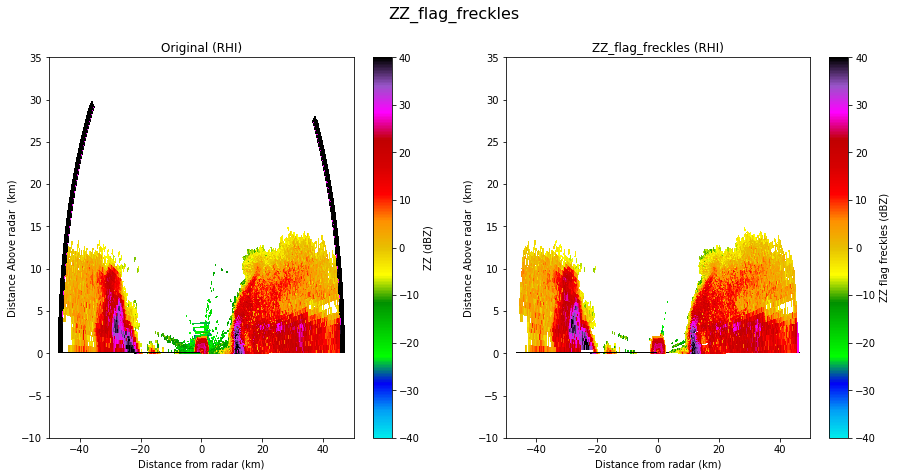

In [ ]:
display = pyart.graph.RadarMapDisplay(radar)

fig, ax = plt.subplots(ncols=2, figsize=(15,7))
display.plot(field='ZZ', vmin=-40, vmax=40, title="Original (RHI)", cmap='pyart_NWSRef', ax=ax[0])
display.set_limits((-50, 50), (-10, 35), ax=ax[0])
display.plot(field="ZZ_flag_freckles", vmin=-40, vmax=40, title="ZZ_flag_freckles" + " (RHI)", cmap='pyart_NWSRef', ax=ax[1])
display.set_limits((-50, 50), (-10, 35), ax=ax[1])
plt.suptitle("ZZ_flag_freckles", fontsize=16)
plt.show()

# Test Forced Unfolding with real data

In [ ]:
#@title Forced Unfolding Parameters
nyquist_velocity = 24.96 #@param {type: "number"}
dds_radd_eff_unamb_vel = 5 #@param {type: "number"}
center = 0 #@param {type: "number"}
forced_unfolding_mask = solo.forced_unfolding_masked(radar.fields['VV']['data'], nyquist_velocity, dds_radd_eff_unamb_vel, center)

In [ ]:
radar.add_field_like('VV', 'VV_forced_unfolding', forced_unfolding_mask, replace_existing=True)

assert ('VV_forced_unfolding' in radar.fields)

In [ ]:
radar.instrument_parameters['nyquist_velocity']

/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:748: UserWarning: Warning: 'partition' will ignore the 'mask' of the MaskedArray.
  a.partition(kth, axis=axis, kind=kind, order=order)
/usr/local/lib/python3.7/site-packages/pyart/graph/radardisplay.py:104: UserWarning: RadarDisplay does not correct for moving platforms
  warnings.warn('RadarDisplay does not correct for moving platforms')


IndexError: ignored

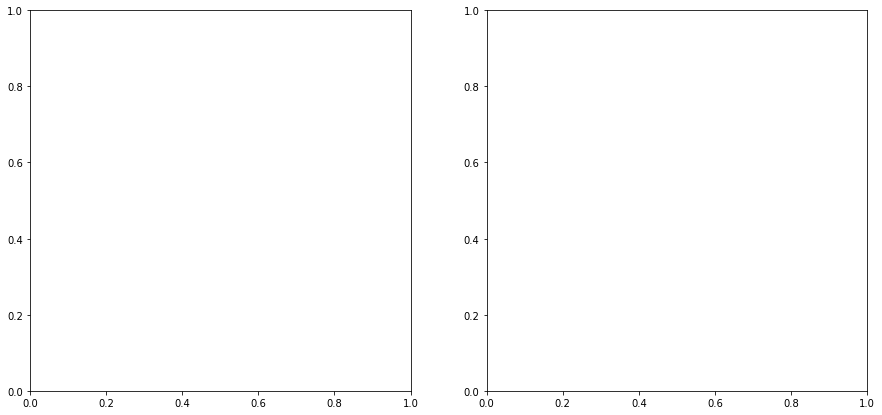

In [ ]:
display = pyart.graph.RadarMapDisplay(radar)
fig, ax = plt.subplots(ncols=2, figsize=(15,7))
display.plot(field='VV', vmin=-40, vmax=40, title="Original (RHI)", cmap='pyart_NWSVel', ax=ax[0], sweep=1)
display.set_limits((-50, 50), (-10, 35), ax=ax[0])
display.plot(field="VV_forced_unfolding", vmin=-40, vmax=40, title="VV_forced_unfolding" + " (RHI)", cmap='pyart_NWSVel', ax=ax[1],  sweep=1)
display.set_limits((-50, 50), (-10, 35), ax=ax[1])
plt.suptitle("VV_forced_unfolding", fontsize=16)
plt.show()

# Test Radial Shear with sample data

In [ ]:
seds_gate_diff_interval = 4
data = [-3, 4, 5, 6, 7, 8, 9, 10]
nGates = 8
bad_data_value = -3
dgi = 8
boundary_mask = [True, True, True, True, True, True, True, True]
expected_data = [-3, 4, 4, 4, 0, 0, 0, 0]
output_data = solo.radial_shear(data, bad, seds_gate_diff_interval)
assert (output_data.data == expected_data), output_data.data

In [ ]:
seds_gate_diff_interval = 5
data = [8, -3, -3, -3, 4, 8, 6, 4, 4, -3, 2, 3]
nGates = 12
bad_data_value = -3
dgi = 10
boundary_mask = [True, True, True, True, True, False, False, False, True, True, True, True]
expected_data = [0, -3, -3, -3, -3, 0, 0, 0, 0, 0, 0, 0]
output_data = solo.radial_shear(data, bad, seds_gate_diff_interval, dgi_clip_gate=dgi)
assert (output_data.data == expected_data), output_data.data


In [ ]:
seds_gate_diff_interval = 30
data = [8, -3, -3, -3, 4, 8, 6, 4, 4, -3, 2, 3]
nGates = 12
bad_data_value = -3
dgi = 10
boundary_mask = [True, True, True, True, True, False, False, False, True, True, True, True]
expected_data = [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
output_data = solo.radial_shear(data, bad, seds_gate_diff_interval, dgi_clip_gate=dgi)
assert (output_data.data == expected_data), output_data.data

# Test Rain Rate with sample data

In [ ]:
# for any good values 'g', sets it to g = (1/300) * 10 ^ (0.1 * g * d_const)
d_const = 4
data = [8, -3, -3, -3, 4, 8, 6, 4, 4, -3, 2, 3]
nGates = 12
bad_data_value = -3
boundary_mask = [True, True, True, True, True, True, True, True, True, True, True, True]
expected_data = [5.282977308, -3, -3, -3, 0.1327023902, 5.282977308, 0.8372954772, 0.1327023902, 0.1327023902, -3, 0.02103191148, 0.05282977308]
output_data = solo.rain_rate(data, bad, d_const)
assert (np.allclose(output_data.data, expected_data))

# Test Remove AC Motion with real data

In [ ]:
data = [3,4,5,6]
newData = [0,0,0,0]
bnd = [1,1,1,1]
bad_flag = -3
vert_velocity = 1
ew_velocity = 1
ns_velocity = 1
ew_gndspd_corr = 1
elevation = 0.0
tilt = 0.0
eff_unamb_vel = 0.0
nyquist_velocity = 10.0
clip_gate = nGates
expected_data = [3, 4, 5, 6]
output_data = solo.remove_ac_motion(data, bad_flag, vert_velocity, ew_velocity, ns_velocity, ew_gndspd_corr, tilt, elevation, dds_radd_eff_unamb_vel, nyquist_velocity)
assert (output_data.data == expected_data), output_data.data

In [ ]:
data = [3,4,-5,6]
newData = [0,0,0,0]
bnd = [1,1,1,1]
bad_flag = -3
vert_velocity = 1
ew_velocity = 1
ns_velocity = 1
ew_gndspd_corr = 1
elevation = 0.0
tilt = 0.0
eff_unamb_vel = 0.0
nyquist_velocity = 3.2
nGates = 4
clip_gate = nGates
expected_data = [3, -2, 1, 0]
output_data = solo.remove_ac_motion(data, bad_flag, vert_velocity, ew_velocity, ns_velocity, ew_gndspd_corr, tilt, elevation, dds_radd_eff_unamb_vel, nyquist_velocity)
assert (output_data.data == expected_data), output_data.data


In [ ]:
import math

data =    [-3,6,5,-3]
newData = [ 0,0,0, 0]
bnd = [1,1,1,1]
bad_flag = -3
vert_velocity = 3 # goes with sin(elevation)
ew_velocity = 1   # these three go with sin(tilt)
ns_velocity = 1
ew_gndspd_corr = 1
elevation = math.pi/2.0 # or any multiple of pi help make ac_vel = 0
tilt = 0.0 # or any multiple of pi help make ac_vel = 0
# Nyquist stuff ...
# keep the Nyquist velocity greater than any data value, 
# to avoid any folding/unfolding
eff_unamb_vel = 0.0 
nyquist_velocity = 10.0
nGates = 4
clip_gate = 2
expected_data = [-3,9,5,-3]  # no changed 
output_data = solo.remove_ac_motion(data, bad_flag, vert_velocity, ew_velocity, ns_velocity, ew_gndspd_corr, tilt, elevation, dds_radd_eff_unamb_vel, nyquist_velocity, dgi_clip_gate=clip_gate)
assert (output_data.data == expected_data), output_data.data

In [ ]:
data = [-3,6,5,-3]
newData = [0,0,0,0]
bnd = [1,1,1,1]
bad_flag = -3
vert_velocity = 3
ew_velocity = 1
ns_velocity = 1
ew_gndspd_corr = 1
elevation = math.pi/2.0 # or any multiple of pi help make ac_vel = 0
tilt = 0.0 # or any multiple of pi help make ac_vel = 0
# Nyquist stuff ...
# keep the Nyquist velocity greater than any data value, 
# to avoid any folding/unfolding
eff_unamb_vel = 0.0 
nyquist_velocity = 5.0 # causes folding
nGates = 4
clip_gate = 2
expected_data = [-3,-1,5,-3]  # no changed 
output_data = solo.remove_ac_motion(data, bad_flag, vert_velocity, ew_velocity, ns_velocity, ew_gndspd_corr, tilt, elevation, dds_radd_eff_unamb_vel, nyquist_velocity, dgi_clip_gate=clip_gate)
assert (output_data.data == expected_data), output_data.data

In [ ]:
data = [-4,-3, 5, 8]
newData = [0,0,0,0]
bnd = [1,1,1,1]
bad_flag = -3
vert_velocity = 3
ew_velocity = 10.0
ns_velocity = 0.0
ew_gndspd_corr = 1  # ac_vel should be 11.0
tilt = math.pi/2.0 # or any multiple of pi help make ac_vel = 0
elevation = 0.0 # or any multiple of pi help make ac_vel = 0
# ac_vel should be unfolded to -1.0
# Nyquist stuff ...
# keep the Nyquist velocity greater than any data value, 
# to avoid any folding/unfolding
eff_unamb_vel = 0.0 
nyquist_velocity = 6.0 # causes folding
nGates = 4
clip_gate = 3
expected_data = [-5,-3,4,8]  # no change 
output_data = solo.remove_ac_motion(data, bad_flag, vert_velocity, ew_velocity, ns_velocity, ew_gndspd_corr, tilt, elevation, dds_radd_eff_unamb_vel, nyquist_velocity, dgi_clip_gate=clip_gate)
assert (output_data.data == expected_data), output_data.data